# $\text{Exact diagonalization of the } \phi \text{ Hamiltonian} - E \text{ } vs \text{ } E_J$

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [2]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

# Qubit parameters

ng_value=0.5

# Qubit parameters 1

E_Cs=1.0
E_J_value=1.0
E_Cj=1.0
E_L=1.0

#Qubit parameters 2

E_Cs_2=(1.0/20)
E_J_2_value=(1.0/5.0)
E_Cj_2=1.0
E_L_2=(1.0/16)

#For E_J calculations

E_J=np.arange(0,1.2,0.2)#1.2
EnergiesEJ=[]
E_J_2=np.arange(0,0.41,0.05)#0.41
Energies2EJ=[]

#For ng calculations

ng=np.arange(0.4,0.69,0.1)
#ng=np.arange(0.4,0.61,0.01)
Energiesng=[]
ng2=np.arange(0.4,0.69,0.1)
#ng2=np.arange(0.4,0.61,0.01)
Energies2ng=[]

In [4]:
# Construction of the 0-pi Hamiltonian

def Hamiltonian_0pi(EJ,ECS,ECJ,EL,n):
    #Initial
    H=np.zeros((2*M+1,2*M+1))   #,dtype=complex
    H_theta=4*ECS*((n_theta-n*Id_M)@(n_theta-n*Id_M))
    #Interaction Hamiltonian construction
    cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta[0][2*M]+=1
    cos_theta[2*M][0]+=1
    H_I=2*EJ*cos_theta #HE QUITADO EL DOOOOOOOOOSSSSSS
    #H_I=np.zeros(((N+1),(N+1)))
    #Total Hamiltonian
    H+=H_theta-H_I  #.astype(complex)
    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [5]:
#Calculation 1

for EJ in E_J:
    print("Step for EJ = ",EJ)
    H_0pi=Hamiltonian_0pi(EJ,E_Cs,E_Cj,E_L,ng_value)
    print(H_0pi)
    print("Hamiltonian built, len(H)=",len(H_0pi)**2)
    vals, _ = eigsh(H_0pi, k=12, which='SA')
    #vals,_=np.linalg.eigh(H_0pi)
    print("1st and 2nd degenerated vals are",vals[0], vals[1],"3rd and 4th degenerated vals", vals[2], vals[3])
    print("Eigenvalues calculated")
    #vals,vects=np.linalg.eigh(H)
    EnergiesEJ.append(vals) #-vals[0]

Step for EJ =  0.0
[[1521.    0.    0. ...    0.    0.    0.]
 [   0. 1369.    0. ...    0.    0.    0.]
 [   0.    0. 1225. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1369.    0.    0.]
 [   0.    0.    0. ...    0. 1521.    0.]
 [   0.    0.    0. ...    0.    0. 1681.]]
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are 0.9999999999998959 0.9999999999999204 3rd and 4th degenerated vals 9.000000000000002 9.000000000000078
Eigenvalues calculated
Step for EJ =  0.2
[[ 1.521e+03  0.000e+00 -4.000e-01 ...  0.000e+00  0.000e+00 -4.000e-01]
 [ 0.000e+00  1.369e+03  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [-4.000e-01  0.000e+00  1.225e+03 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  1.369e+03  0.000e+00 -4.000e-01]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  1.521e+03  0.000e+00]
 [-4.000e-01  0.000e+00  0.000e+00 ... -4.000e-01  0.000e+00  1.681e+03]]
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals ar

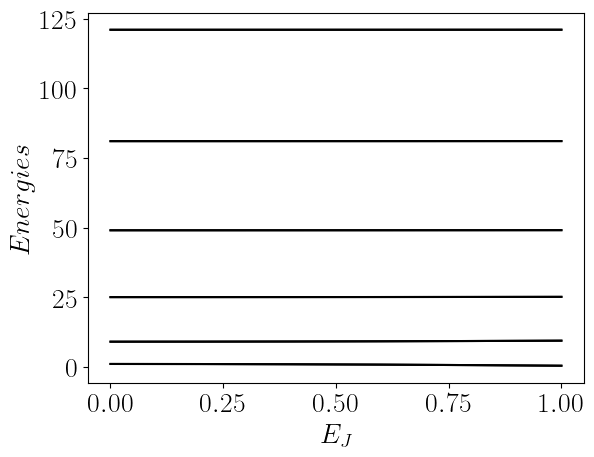

In [6]:
#Plot 1

plt.plot(E_J,EnergiesEJ,c="k")
#plt.ylim(-10,140)
#plt.ylim(1.7,4.2)
#plt.xlim(-0.05,0.4)
plt.xlabel('$E_J$')
plt.ylabel('$Energies$')
#plt.savefig('2THETA_Energies_vs_EJ_M900.pdf')
plt.show()

In [7]:
for n in ng:
    print("Step for phi_ext = ",n)
    H=Hamiltonian_0pi(E_J_value,E_Cs,E_Cj,E_L,n)
    print("Hamiltonian built, len(H)=",len(H)**2)
    #vals,vects=np.linalg.eigh(H)
    valsng, _ = eigsh(H, k=4, which='SA')#, tol=1e-6
    #valsng,_=np.linalg.eigh(H)
    print(valsng[0],valsng[1],valsng[2],valsng[3])
    print("Eigenvalues calculated")
    Energiesng.append(valsng)

Step for phi_ext =  0.4
Hamiltonian built, len(H)= 1681
0.06917886371900148 0.7190110237084569 8.299921507072128 10.534620528088
Eigenvalues calculated
Step for phi_ext =  0.5
Hamiltonian built, len(H)= 1681
0.3693460674487038 0.36934606744902615 9.363042593455901 9.363042593455994
Eigenvalues calculated
Step for phi_ext =  0.6
Hamiltonian built, len(H)= 1681
0.06917886371912207 0.7190110237083308 8.299921507072396 10.534620528088249
Eigenvalues calculated


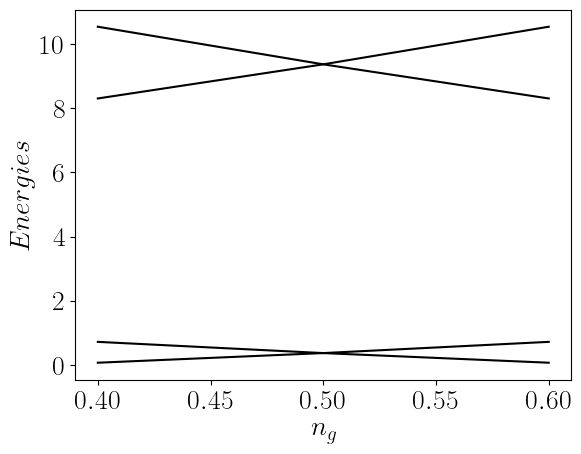

In [8]:
#Plot 1 

plt.plot(ng,Energiesng,c="k")
#plt.ylim(-2,11)
plt.xlabel('$n_g$')
plt.ylabel('$Energies$')
#plt.savefig('2THETA_Energies_vs_ng_M900.pdf')
plt.show()

## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.

In [9]:
#Calculation 2

for EJ2 in E_J_2:
    print("Step for EJ = ",EJ2)
    H_0pi_2=Hamiltonian_0pi(EJ2,E_Cs_2,E_Cj_2,E_L_2,ng_value)
    print("Hamiltonian built, len(H)=",len(H_0pi_2)**2)
    vals2, _ = eigsh(H_0pi_2, k=12, which='SA')
    #vals2,_=np.linalg.eigh(H_0pi_2)
    print("1st and 2nd degenerated vals are",vals2[0], vals2[1],"3rd and 4th degenerated vals", vals2[2], vals2[3])
    print("Eigenvalues calculated")
    #vals2,vects2=np.linalg.eigh(H2)
    Energies2EJ.append(vals2)

Step for EJ =  0.0
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are 0.04999999999999884 0.05000000000000098 3rd and 4th degenerated vals 0.4499999999999965 0.450000000000002
Eigenvalues calculated
Step for EJ =  0.05
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are 0.01846730337244304 0.018467303372447966 3rd and 4th degenerated vals 0.46815212967279224 0.4681521296727994
Eigenvalues calculated
Step for EJ =  0.1
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.06145707012640105 -0.061457070126397395 3rd and 4th degenerated vals 0.507436017423979 0.5074360174239794
Eigenvalues calculated
Step for EJ =  0.15000000000000002
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.16853391627573175 -0.16853391627572073 3rd and 4th degenerated vals 0.545594760311767 0.5455947603117733
Eigenvalues calculated
Step for EJ =  0.2
Hamiltonian built, len(H)= 1681
1st and 2nd degenerated vals are -0.2909714165831881 -0.2909714165831842

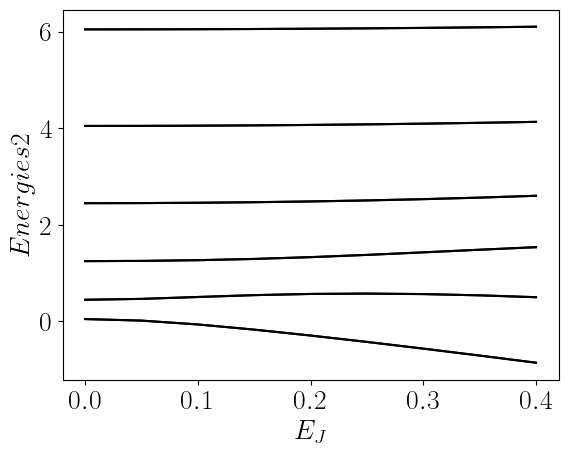

In [10]:
#Plot 2

plt.plot(E_J_2,Energies2EJ,c="k")
#plt.ylim(-1,7)
#plt.xlim(-0.02,0.42)
plt.xlabel('$E_J$')
plt.ylabel('$Energies2$')
#plt.savefig('2THETA_Energies2_vs_EJ_M900.pdf')
plt.show()

In [11]:
#Calculations 2 

for n2 in ng2:
    print("Step for ng = ",n2)
    H2=Hamiltonian_0pi(E_J_2_value,E_Cs_2,E_Cj_2,E_L_2,n2)
    print("Hamiltonian built, len(H)=",len(H2)**2)
    #vals2ng,_=np.linalg.eigh(H2)
    vals2ng, _ = eigsh(H2, k=4, which='SA')
    print(vals2ng[0],vals2ng[1],vals2ng[2],vals2ng[3])
    print("Eigenvalues calculated")
    Energies2ng.append(vals2ng)

Step for ng =  0.4
Hamiltonian built, len(H)= 1681
-0.2947234049431701 -0.2871228459663008 0.5378307000353645 0.6080530061693955
Eigenvalues calculated
Step for ng =  0.5
Hamiltonian built, len(H)= 1681
-0.2909714165831986 -0.2909714165831895 0.5704754203950038 0.5704754203950219
Eigenvalues calculated
Step for ng =  0.6
Hamiltonian built, len(H)= 1681
-0.29472340494316174 -0.28712284596629417 0.5378307000353476 0.6080530061693773
Eigenvalues calculated


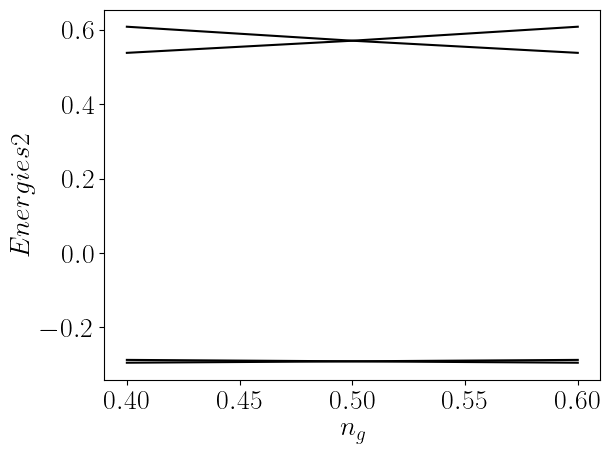

In [12]:
#Plot 2 

plt.plot(ng2,Energies2ng,c="k")
#plt.ylim(-0.4,0.7)
plt.xlabel('$n_g$')
plt.ylabel('$Energies2$')
#plt.savefig('2THETA_Energies2_vs_ng_M900.pdf')
plt.show()

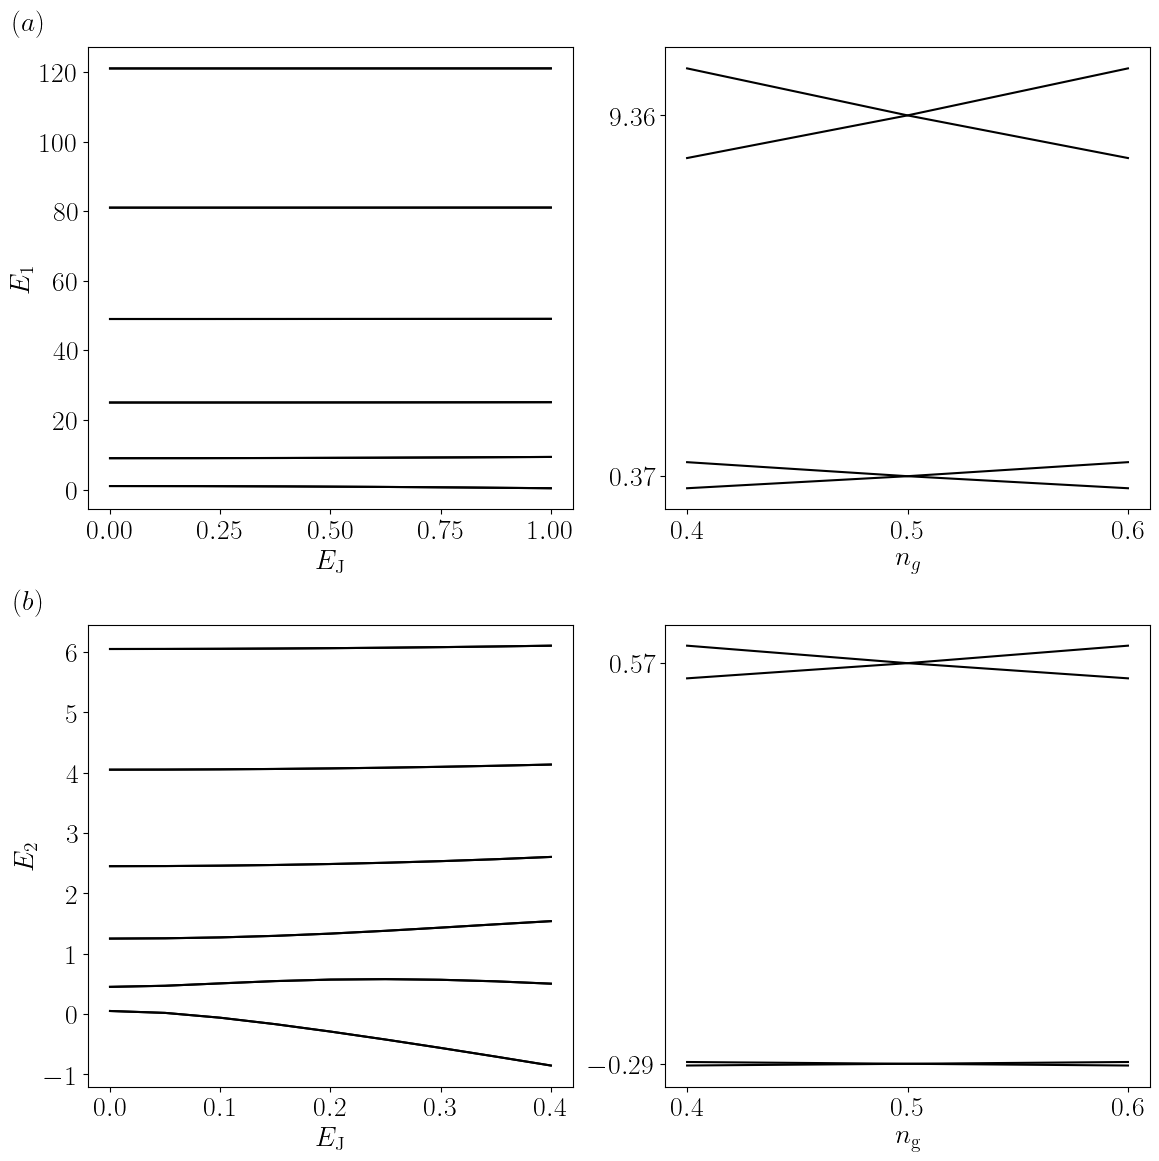

In [29]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 1
ax1 = fig.add_subplot(221)
ax1.plot(E_J, EnergiesEJ, c="k")
ax1.set_xlabel(r'$E_{\rm J}$')
ax1.set_ylabel(r'$E_1$')
ax1.text(-0.22,132,r'$(a)$', fontsize=20)

# Plot 2
ax2 = fig.add_subplot(222)
ax2.plot(ng, Energiesng, c="k")
ax2.set_xlabel(r'$n_g$')
#ax2.set_ylabel(r'$E (1)$')
ax2.set_xticks([0.4, 0.5, 0.6])
ax2.set_xticklabels([r"$0.4$", r"$0.5$", r"$0.6$"])
ax2.set_yticks([0.369346067449019, 9.363042593455653])
ax2.set_yticklabels([r"$0.37$", r"$9.36$"])
#ax2.text(0.335,11.5,r'$(b)$', fontsize=20)

# Plot 3
ax3 = fig.add_subplot(223)
ax3.plot(E_J_2, Energies2EJ, c="k")
ax3.set_xlabel(r'$E_{\rm J}$')
ax3.set_ylabel(r'$E_2$')
ax3.text(-0.087,6.7,r'$(b)$', fontsize=20)

# Plot 4
ax4 = fig.add_subplot(224)
ax4.plot(ng2, Energies2ng, c="k")
ax4.set_xlabel(r'$n_{\rm g}$')
#ax4.set_ylabel(r'$E_2$')
ax4.set_xticks([0.4, 0.5, 0.6])
ax4.set_xticklabels([r"$0.4$", r"$0.5$", r"$0.6$"])
ax4.set_yticks([-0.29097141658320425, 0.5704754203950059])
ax4.set_yticklabels([r"$-0.29$", r"$0.57$"])
#ax4.text(0.335,0.69,r'$(d)$', fontsize=20)

# Adjust the spacing between subplots
fig.tight_layout()
fig.subplots_adjust(wspace=0.19,hspace=0.25)

# Show the figure
#plt.savefig('2THETA_Energies_vs_EJ&ng_M20_INTNO2.png',dpi=300,bbox_inches='tight')
plt.show()